# 1. 회귀분석이란 ?

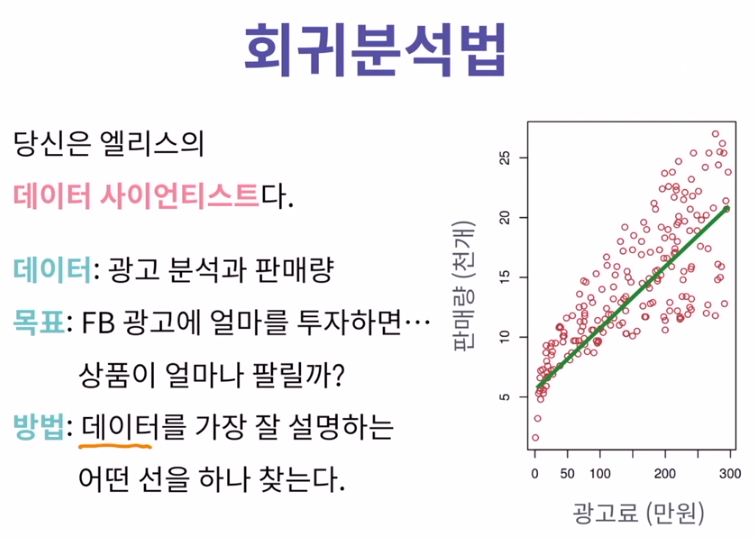

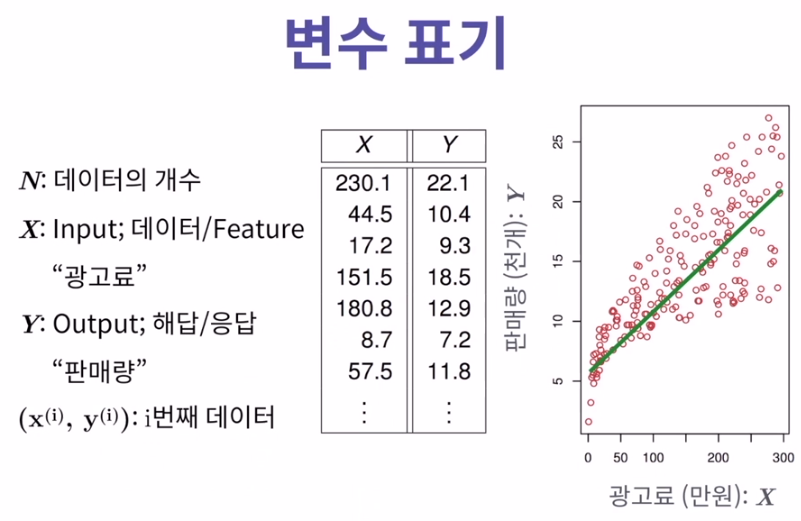

# 2. 모델의 학습 목표

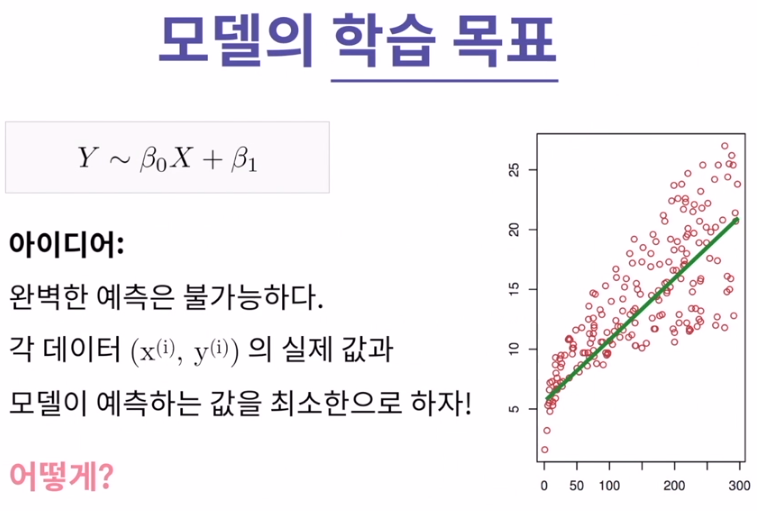

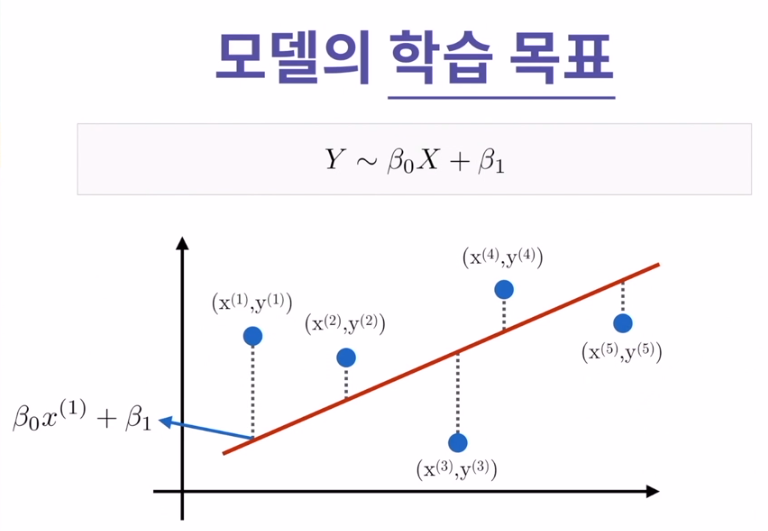

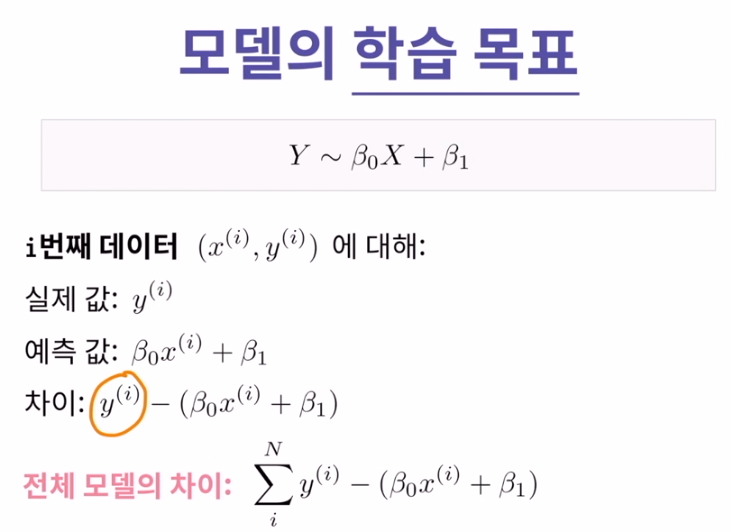

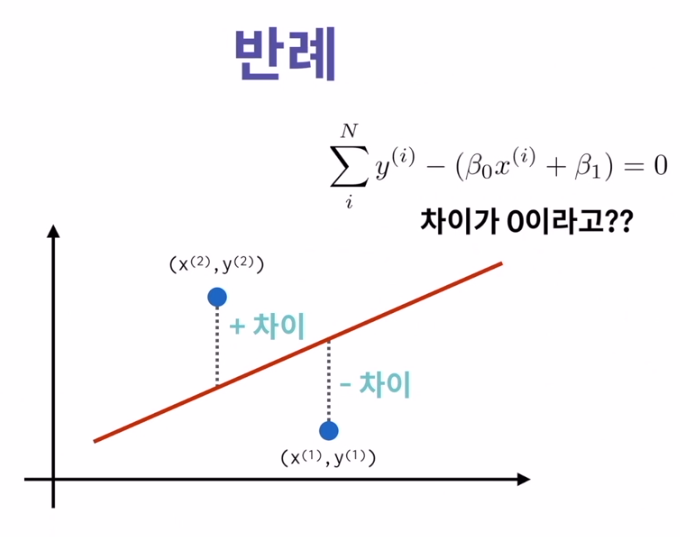

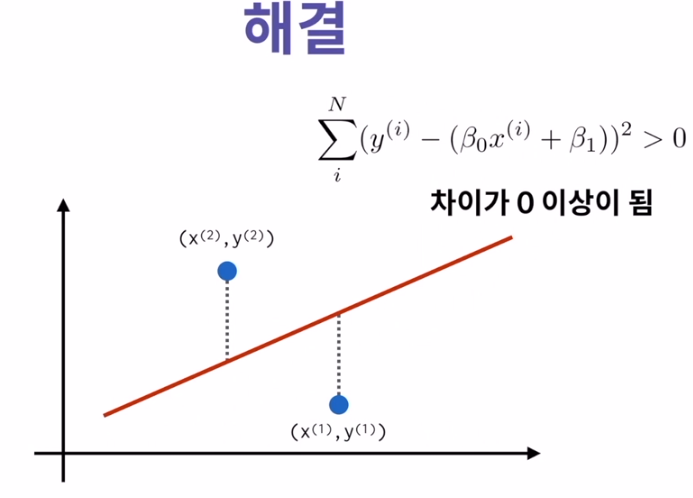

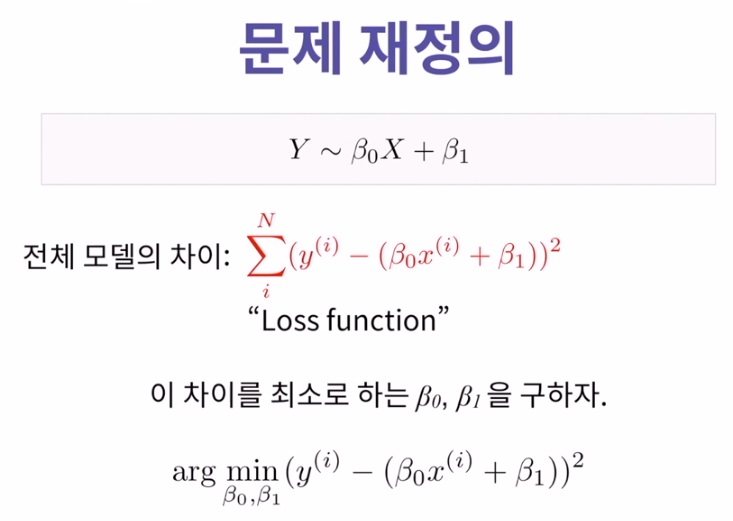

## 1 ) 실습

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴합니다.
    '''
    total_loss = 0
    for i in range(N) :
        y_i = y[i]
        x_i = x[i]
        y_pred = beta_0 * x_i + beta_1
        
        dif = (y_i - y_pred) ** 2
        total_loss += dif
    
    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.


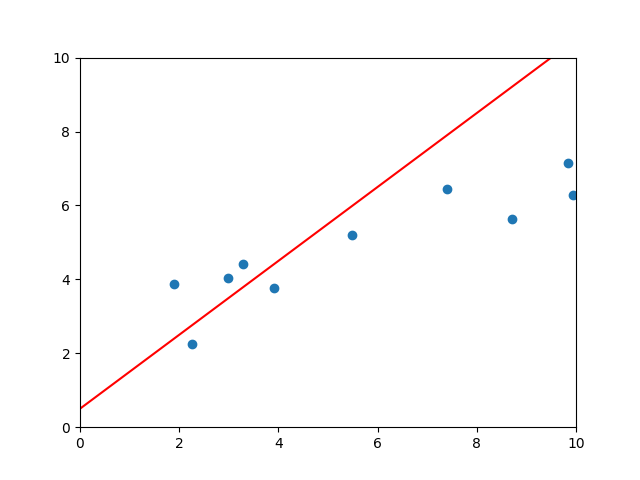

In [ ]:
# 윗 부분을 numpy를 이용해서 짧게 바꿀 수 있다
# for 문 x , 새로운 변수 생성 x
x = np.array(x)
y = np.array(y)
y_pred = beta_0 * x + beta_1
total_loss = np.sum((y - y_pred) ** 2

# 3. 산 정상 오르기

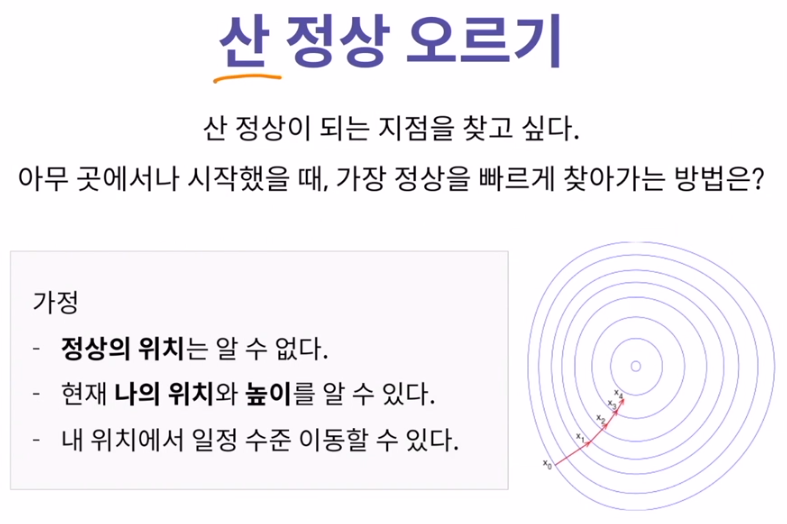

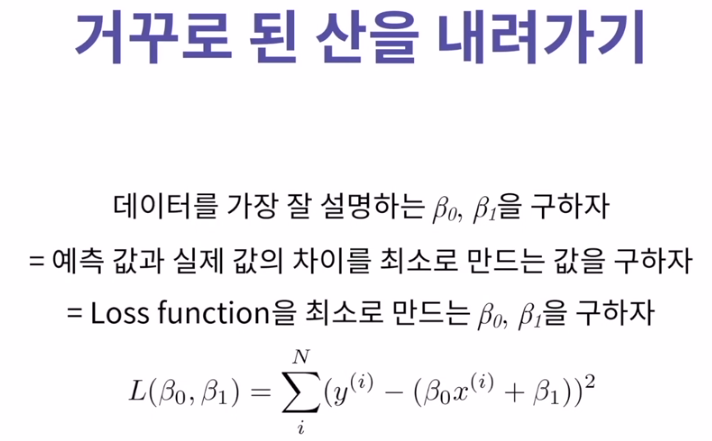

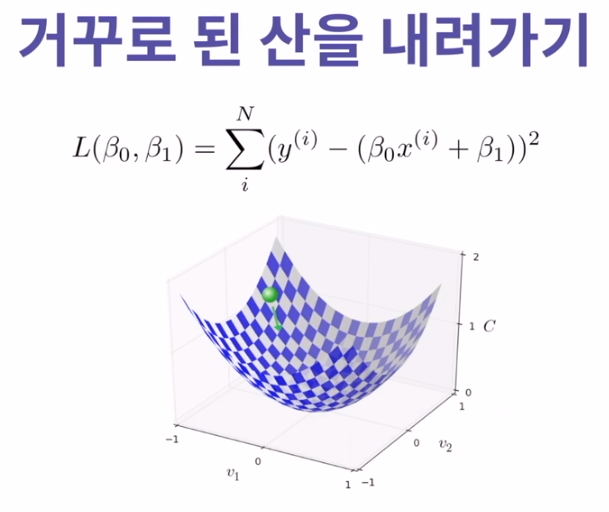

# 4. scikit learn 이용한 선형회귀분석

beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


(0, 10)

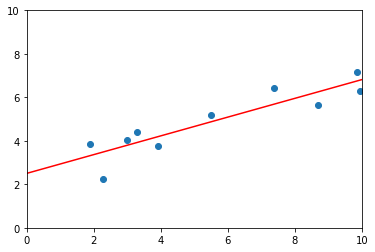

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    이전 실습에서 구현한 loss function을 여기에 붙여넣습니다.
    '''
    total_loss = 0
    for i in range(N) :
        y_i = y[i]
        x_i = x[i]
        y_pred = beta_0 * x_i + beta_1
        
        dif = (y_i - y_pred) ** 2
        total_loss += dif
    
    return total_loss
    
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = np.array(X).reshape(-1,1)
train_Y = np.array(Y)

'''
여기에서 모델을 트레이닝합니다.
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

# 5. 다중 선형 회귀 분석

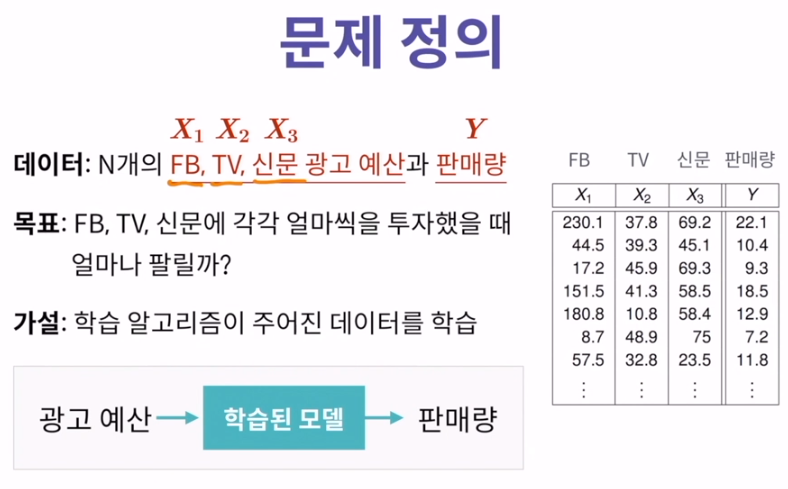

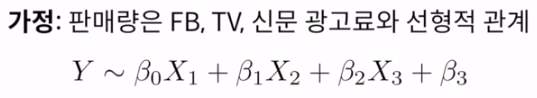

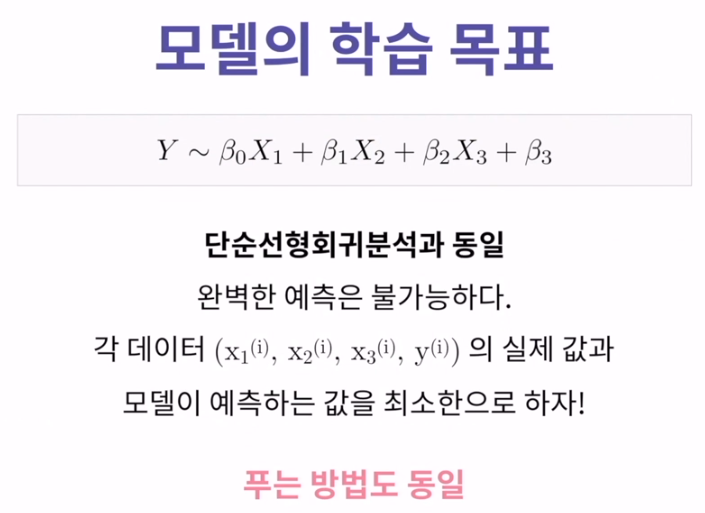

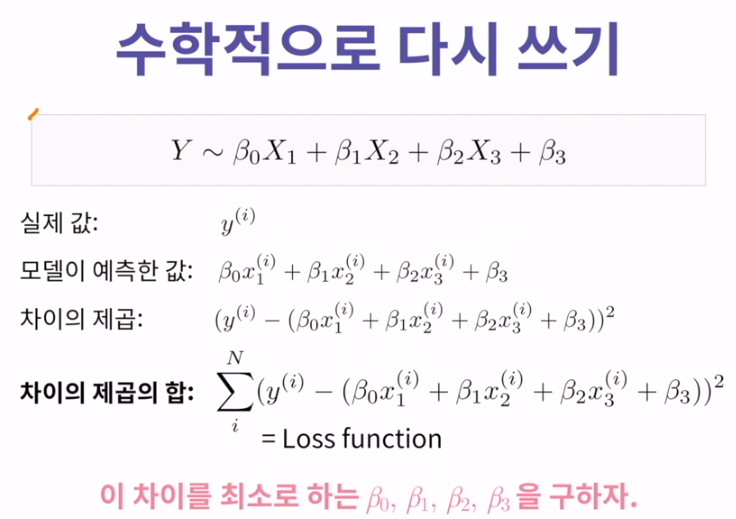

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv
csvreader = csv.reader(open("data/Advertising.csv"))

x = []
y = []

next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력합니다.
    '''
    
    sales = beta_0 * fb + beta_1 * tv + beta_2 * newspaper + beta_3
    
    return sales

print("예상 판매량: %f" % expected_sales(10, 12, 3, beta_0, beta_1, beta_2, beta_3))

# 6. 다항식 회귀 분석

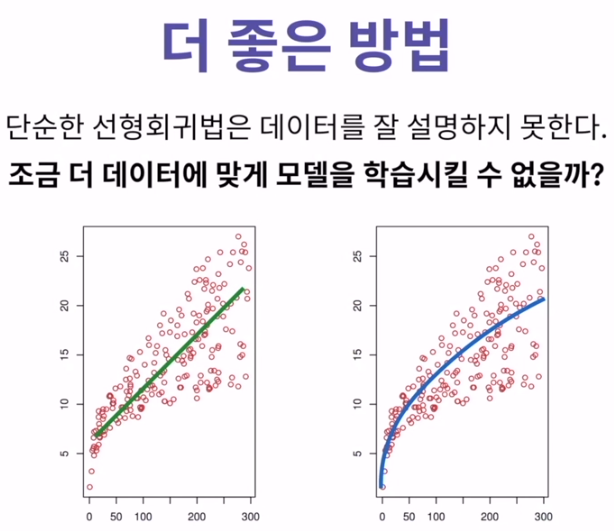

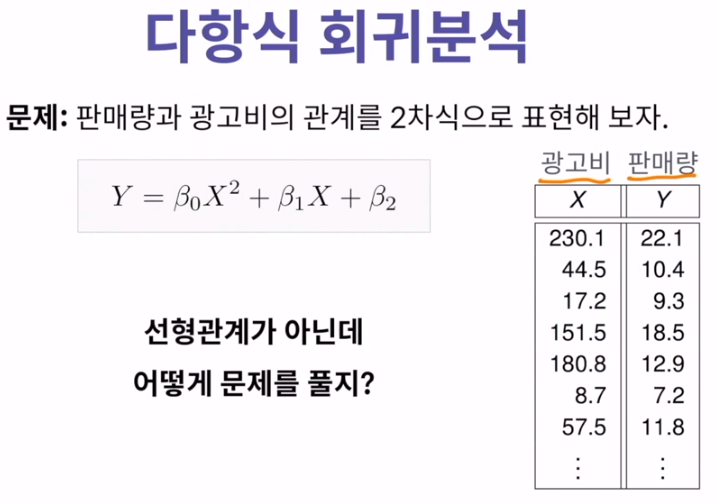

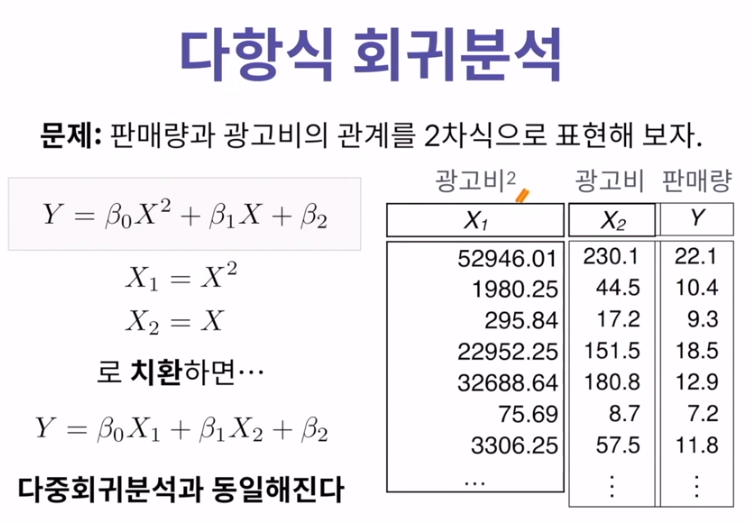

Overfitting
데이터는 크게 트레이닝(training)과 테스트(Test) 세트로 나누어집니다. 트레이닝 데이터는 모델을 학습할 때, 테스트 데이터는 학습한 모델을 평가할 때 사용됩니다.

두 세트로 나누어서 모델을 각각 적용해보는 이유는, 만든 머신러닝 모델이 잘 예측하는지 검증하기 위함입니다. 이를 교차검증이라고 합니다.

모델을 복잡하게 만들면 트레이닝 데이터에서 정확도를 높힐 수 있지만 동일한 모델을 테스트 데이터에 적용하면 과적합(Overfitting) 현상이 일어나게 됩니다.

과적합 현상은 트레이닝 데이터에만 적합하게끔 모델을 작성하면 데이터 전체에 대해서는 모델이 잘 적용되지 않는 것입니다.

## 1 ) 숙제 - 다항식 회귀분석

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv
csvreader = csv.reader(open("data/Advertising.csv"))

x = []
y = []

next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)


# 다항식 회귀분석을 진행하기 위해 변수들을 조합합니다.
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] ** 2, # X_1^2
        x_i[1], # X_2
        x_i[1] * x_i[2], # X_2 * X_3
        x_i[2], # X_3
        x_i[0],
        x_i[1] ** 2,
        x_i[2] ** 2,
        x_i[0] * x_i[2],
        x_i[1] * x_i[0],
        
    ])



# X, Y를 80:20으로 나눕니다. 80%는 트레이닝 데이터, 20%는 테스트 데이터입니다.
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.4, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석을 진행합니다.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
    


#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구합니다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구합니다. 이 값이 1 미만이 되도록 모델을 구성해 봅니다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

## 2 ) 영어단어의 특성과 단어의 사용 빈도수

In [ ]:
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import elice_utils
from operator import itemgetter

def main():
    words = read_data()
    words = sorted(words,key=itemgetter(1)) # words.txt 단어를 빈도수 순으로 정렬합니다.
    # 정수로 표현된 단어를 X축 리스트에, 각 단어의 빈도수를 Y축 리스트에 저장합니다.  
    X = list(range(1, len(words)+1))
    Y = [x[1] for x in words]
    
    # X, Y 리스트를 array로 변환한 후 각 원소 값에 log()를 적용합니다.
    X, Y = np.array(X), np.array(Y)  
    X, Y = np.log(X), np.log(Y)
    
    # 기울기와 절편을 구한 후 그래프와 차트를 출력합니다. 
    slope, intercept = do_linear_regression(X, Y)
    draw_chart(X, Y, slope, intercept)
    
    return slope, intercept


# read_data() - words.txt에 저장된 단어와 해당 단어의 빈도수를 리스트형으로 변환합니다.
def read_data():
    # words.txt 에서 단어들를 읽어, 
    # [[단어1, 빈도수], [단어2, 빈도수] ... ]형으로 변환해 리턴합니다.
    import csv
    csvreader = csv.reader(open("words.txt"))
    words = []
    
    next(csvreader)
    
    for line in csvreader :
        words.append([line[0], line[1]])

    return words


# do_linear_regression() - 임포트한 sklearn 패키지의 함수를 이용해 그래프의 기울기와 절편을 구합니다.
def do_linear_regression(X, Y):
    # do_linear_regression() 함수를 작성하세요.
    lrmodel = LinearRegression()
    lrmodel.fit(X, Y)
    
    slope = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
    intercept = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

    return (slope, intercept)


# draw_chart() - matplotlib을 이용해 차트를 설정합니다.
def draw_chart(X, Y, slope, intercept):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X, Y)

    # 차트의 X, Y축 범위와 그래프를 설정합니다.
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = max_X * slope + intercept
    plt.plot([min_X, max_X], [min_Y, max_Y], 
             color='red',
             linestyle='--',
             linewidth=3.0)
    
    # 기울과와 절편을 이용해 그래프를 차트에 입력합니다.
    ax.text(min_X, min_Y + 0.1, r'$y = %.2lfx + %.2lf$' % (slope, intercept), fontsize=15)
    
    plt.savefig('chart.png')
    elice_utils.send_image('chart.png')

if __name__ == "__main__":
    main()